In [1]:
cd C:\Users\PERT\Downloads\ML\Classification

C:\Users\PERT\Downloads\ML\Classification


In [2]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
#sns.set(rc={'figure.figsize':(20,10)})


In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df['cap-color'].replace('n','brown',inplace=True)
df['cap-color'].replace('b','buff',inplace=True)
df['cap-color'].replace('c','cinnamon',inplace=True)
df['cap-color'].replace('g','gray',inplace=True)
df['cap-color'].replace('r','green',inplace=True)
df['cap-color'].replace('p','pink',inplace=True)
df['cap-color'].replace('u','purple',inplace=True)
df['cap-color'].replace('e','red',inplace=True)
df['cap-color'].replace('w','white',inplace=True)
df['cap-color'].replace('y','yellow',inplace=True)
df['cap-color'].replace('n','brown',inplace=True)
df['cap-surface'].replace('f','fibrous',inplace=True)
df['cap-surface'].replace('g','grooves',inplace=True)
df['cap-surface'].replace('y','scaly',inplace=True)
df['cap-surface'].replace('s','smooth',inplace=True)
df['odor'].replace('a','almond',inplace=True)
df['odor'].replace('l','anise',inplace=True)
df['odor'].replace('c','cresote',inplace=True)
df['odor'].replace('y','fishy',inplace=True)
df['odor'].replace('f','foul',inplace=True)
df['odor'].replace('m','musty',inplace=True)
df['odor'].replace('n','odourless',inplace=True)
df['odor'].replace('p','pungent',inplace=True)
df['odor'].replace('s','spicy',inplace=True)
df['class'].replace('p','1',inplace=True)
df['class'].replace('e','0',inplace=True)

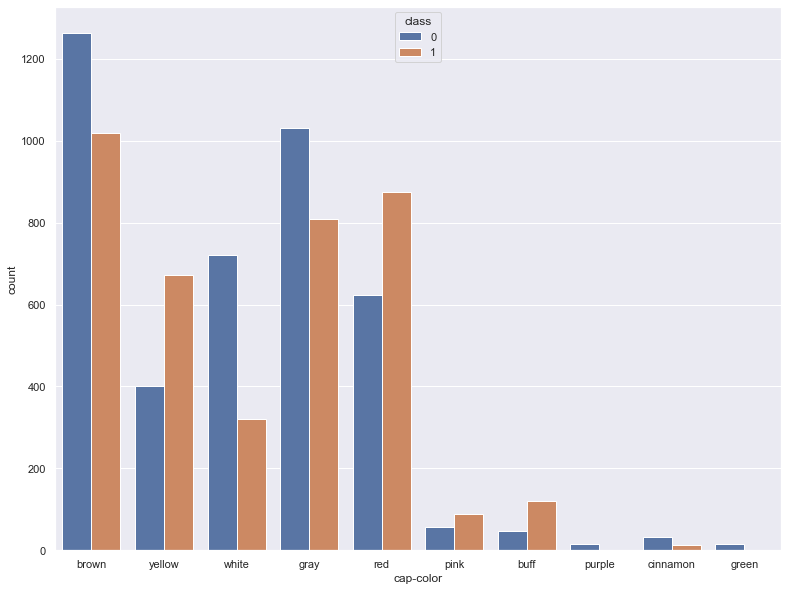

In [6]:
sns.set(rc={'figure.figsize':(13,10)})
sns.countplot(data=df,x='cap-color',hue='class')


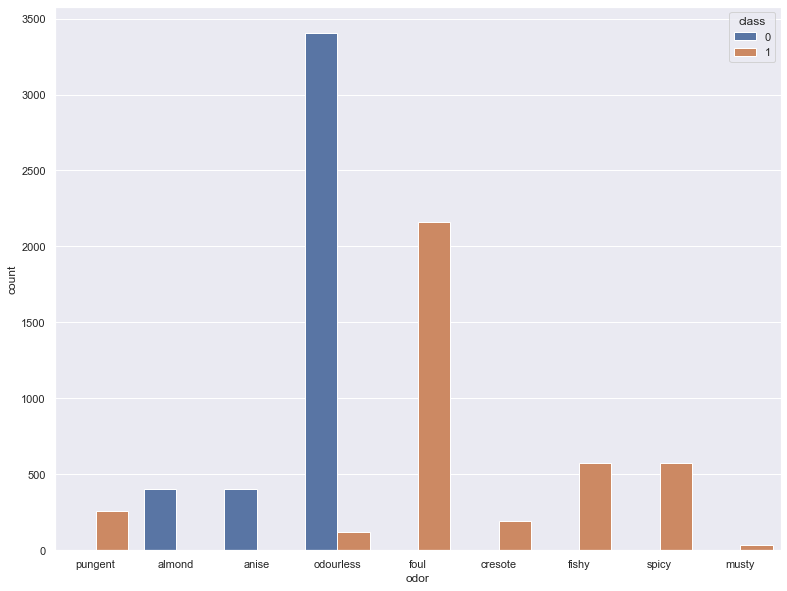

In [7]:
sns.set(rc={'figure.figsize':(13,10)})
sns.countplot(data=df,x='odor',hue='class')


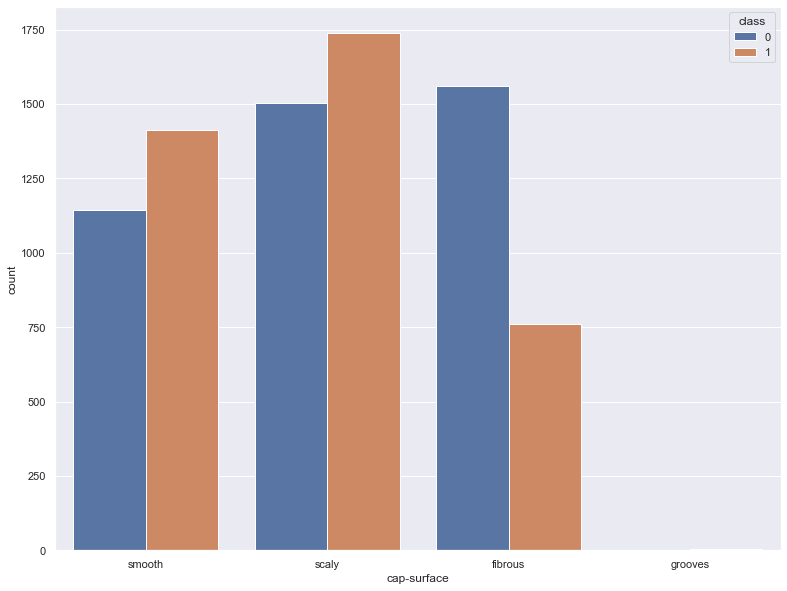

In [8]:
sns.set(rc={'figure.figsize':(13,10)})
sns.countplot(data=df,x='cap-surface',hue='class')


In [9]:
features = ['cap-surface','cap-color','odor']
X = df[features]
X.head()

,cap-surface,cap-color,odor
0,smooth,brown,pungent
1,smooth,yellow,almond
2,smooth,white,anise
3,scaly,white,pungent
4,smooth,gray,odourless


In [10]:
X_temp = df[features] 
X = pd.get_dummies(X_temp) # covert to numeric

In [11]:
y = df['class']

In [12]:
from sklearn.model_selection import train_test_split # split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() #initialize
log_reg.fit(X_train,y_train) #fit model
y_pred = log_reg.predict(X_test) #predict


In [14]:
# feature importance
log_reg.coef_

array([[-0.93589076,  1.33534943,  0.072618  , -0.47286307, -0.98894506,
         1.50177383, -0.49815626, -1.54328864, -0.48965599,  1.5854901 ,
        -0.52212903, -1.2783746 ,  0.51726324,  1.71523602, -6.98607069,
        -6.95401753,  2.74139585,  3.68567964,  4.76753337,  1.39466745,
        -4.87492451,  2.52909789,  3.69585213]])

In [15]:
X.head()

,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,...,cap-color_yellow,odor_almond,odor_anise,odor_cresote,odor_fishy,odor_foul,odor_musty,odor_odourless,odor_pungent,odor_spicy
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
from sklearn.metrics import accuracy_score
# metrics (accuracy)
acc = log_reg.score(X_test, y_test)
print("mean accuracy: ",acc)
print("prediction accuracy: ",accuracy_score(y_pred, y_test))

mean accuracy:  0.9839612085042895
prediction accuracy:  0.9839612085042895


[[1378    0]
 [  43 1260]]


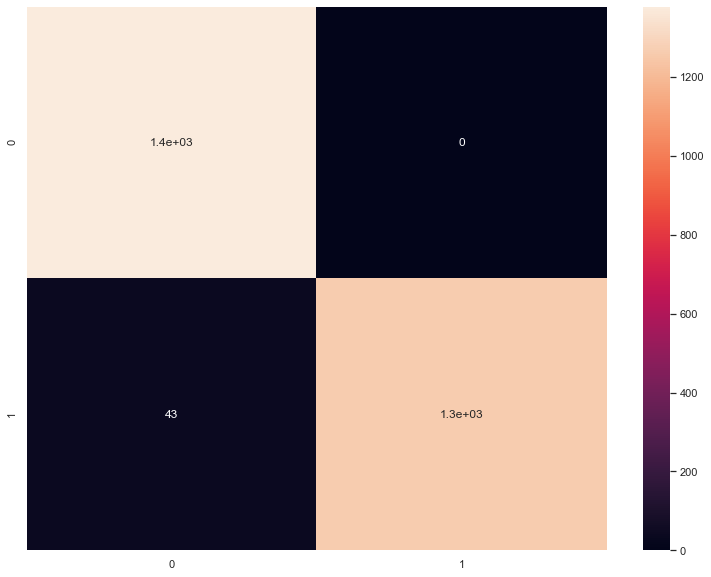

In [17]:
from sklearn.metrics import confusion_matrix

# confusion matrix
cf = confusion_matrix(y_test, y_pred)
print(cf)
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

In [18]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1378
           1       1.00      0.97      0.98      1303

    accuracy                           0.98      2681
   macro avg       0.98      0.98      0.98      2681
weighted avg       0.98      0.98      0.98      2681



Now that we are pretty confident with our model, let's check out the random mushroom you found by the forest.
Your mushroom is: smooth, brown and odourless.

In [28]:
mylist = [['smooth','brown','odourless']]
mymushroom = pd.DataFrame(mylist, columns = ['cap-surface','cap-color','odor'])
mymushroom = mymushroom.reindex(labels=X.columns,axis=1,fill_value=0)
mymushroom['cap-surface_smooth'] = 1
mymushroom['cap-color_brown'] = 1
mymushroom['odor_odourless'] = 1
mymushroom

,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,...,cap-color_yellow,odor_almond,odor_anise,odor_cresote,odor_fishy,odor_foul,odor_musty,odor_odourless,odor_pungent,odor_spicy
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
log_reg.predict(mymushroom) # 1 is poisonous 2 is edible

array(['0'], dtype=object)

Yay! You are 98% sure that mushroom is edible. Enjoy!